<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
office = pd.read_csv("datasets/office_episodes.csv", parse_dates=["release_date"])
plt.rcParams['figure.figsize'] = [11, 7]

In [4]:
office.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [18]:
colors = []

for i, row in office.iterrows():
    if row["scaled_ratings"] < 0.25:
        colors.append("red")
    elif row["scaled_ratings"] < 0.5:
        colors.append("orange")
    elif row["scaled_ratings"] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

In [6]:
sizes = []

for i, row in office.iterrows():
    if row["has_guests"]:
        sizes.append(250)
    else:
        sizes.append(25)

In [7]:
office["colors"] = colors
office["sizes"] = sizes

In [8]:
w_guest = office[office["has_guests"] == True]
wo_guest = office[office["has_guests"] == False]

No handles with labels found to put in legend.


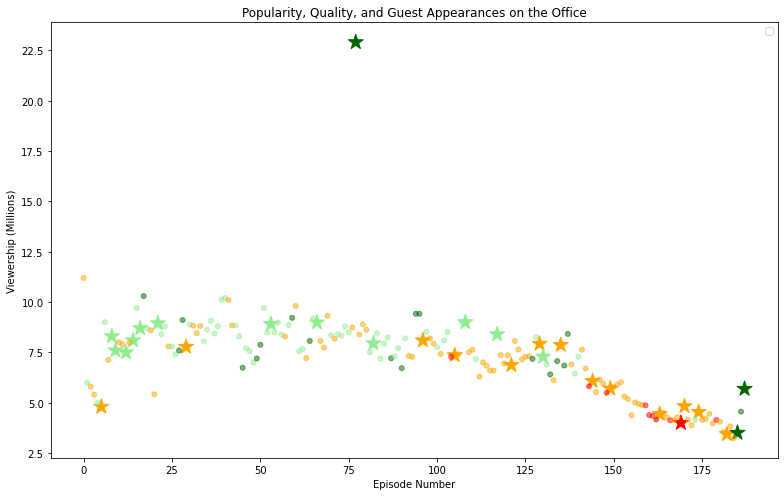

In [9]:
fig = plt.figure()

plt.scatter(w_guest['episode_number'], 
            w_guest['viewership_mil'],
            marker='*', c=w_guest["colors"], s=w_guest["sizes"])

plt.scatter(wo_guest['episode_number'], 
            wo_guest['viewership_mil'],
            marker='o', c=wo_guest["colors"], s=wo_guest["sizes"], alpha=0.5)

plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.legend()
plt.show()

### Checking which episode has the most viewership

In [10]:
most_viewed =office[office["viewership_mil"] == office["viewership_mil"].max()]
most_viewed

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875,darkgreen,250



#### Guest stars of that episode

In [11]:
list(most_viewed["guest_stars"])

['Cloris Leachman, Jack Black, Jessica Alba']

In [12]:
top_star="Jack Black"

### Which guest appeared the most within all episodes?

In [13]:
office_guests = office[["guest_stars"]].dropna()

In [14]:
guests = []
for i, row in office_guests.iterrows():
    for guest in row["guest_stars"].split(", "):
        guests.append(guest)

In [15]:
from collections import Counter
guest_df = pd.DataFrame(guests, columns=["Guest"])


counts = guest_df['Guest'].value_counts()

guest_counts = pd.DataFrame({
    'Name': counts.index,
    'Count': counts.values
})

max_count = guest_counts['Count'].max()
df_max_counts = guest_counts[guest_counts['Count'] == max_count]

df_max_counts

,Name,Count
0,Amy Adams,2
1,Josh Groban,2
2,Ricky Gervais,2
